In [1]:
# Author: ComputingVictor
# Source: https://www.kaggle.com/code/computingvictor/ocr-text-detect-xml-preprocessing

In [2]:
# Basic libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
import re

# OCR libraries.
import pytesseract
from pytesseract import Output
import keras_ocr
from keras_ocr.detection import Detector
from keras_ocr.recognition import Recognizer
from keras_ocr import pipeline

# XML reader.
import xml.etree.ElementTree as ET

2025-03-12 17:41:02.554749: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-12 17:41:02.569955: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-12 17:41:02.573900: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-12 17:41:02.585469: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-12 17:41:03.523112: W tensorflow/compiler/tf2

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


2025-03-12 17:41:04.795926: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


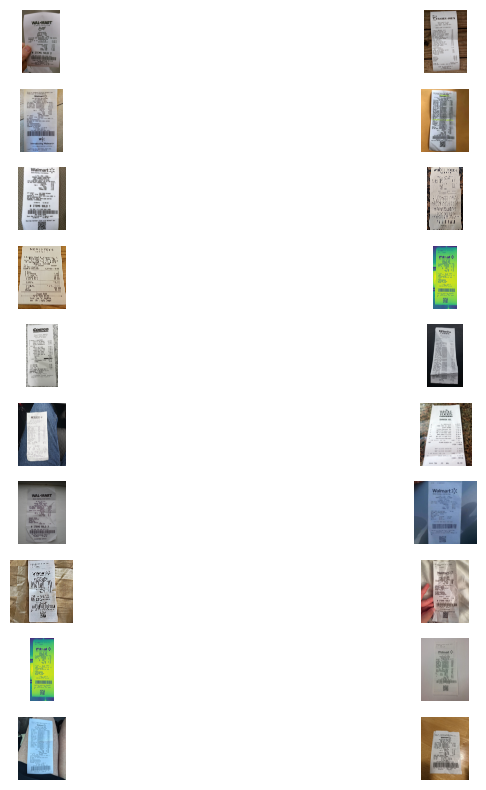

In [8]:
# Load the CSV with the images names.
df = pd.read_csv('./receipts.csv')

# Input the number of columns for the display.
num_cols = 2

# Calculation of the total images and rows 
num_images = len(df)
num_rows = int(np.ceil(num_images / num_cols))

# Plot the pictures
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
for i, row in df.iterrows():
    row_idx = i // num_cols
    col_idx = i % num_cols
    image_path = "./" + str(row['image_name'])
    img = mpimg.imread(image_path)
    axes[row_idx, col_idx].imshow(img)
    axes[row_idx, col_idx].axis('off')

# Display the pictures.
plt.tight_layout()
plt.show()

Give us feedback @ survey.walmart .com
Thank you! ID #:7PB6SJWCFZ2

Walmart >\<

949-498-6669 Mor : Mae
951_AVENIDA PICO
SAN CLEMENTE CA 92673
ST# 02527 OP# 009045 TE# 45 TR¥ 06193
GV OATMEAL 007874243408 F = :1.76 0
OT 2002 TUM 081236803115 6.74 X
M ATHLETICS 019104567781 24.97 X
DEXAS 15X20 008429710921 12.97 X
SUBTOTAL 46.44
TAX 1 7.750 % 3.46

TOTAL
DEBIT TEND 49.90
CHANGE DUE 0.00
EFT DEBIT PAY FROM PRIMARY
49.90 TOTAL PURCHASE
US DEBIT xxx naxx trex 9689 I 0
REF # 029200639128

NETWORK ID. 0056 APPR CODE 461500
US DEBIT

1004
ea 11:30:42

wii ii

+S
Pitroduciny Walmart+
Join today at walmarL.com/plus

‘ices You Trust. Every Day.
bw re era” Tt:80:46




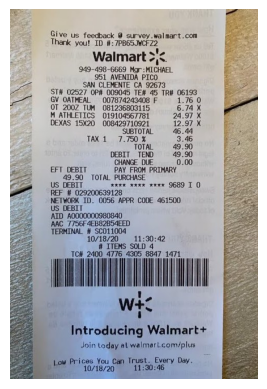

In [ ]:
# Example 1

# Load the image.
img = mpimg.imread('./images/2.jpg')

# OCR detecion.
text = pytesseract.image_to_string(img,lang='eng')
print(text)

# Display the picture.
plt.imshow(img)
plt.axis('off') 
plt.show()

MOMI & TOY’S

CREPERIE

CTepS Mall Kemang, lL.
emang VI No. 6
momiantoys_ind Cinst
@indmomi Ctwitter)
Check: 3850

Pax: OP: Gunawan Gunawan
POS Title:Cashier
ra 26/01/2016 16:13
1 Woman 0
2 Ham Cheese 74, 000
1 Ice Java Tea 16, 000
1 Mineral Water 13, 000
1 Black & White 72, 000
SUBTOTAL 175, 000
TOTAL 175, 000
CASH 200, 000
Change 25

Closed Bil]
eral eiteaiataatate 26/01/2015 16: 14----------->
Thank you for tasting
our “Meltingly Crepe"



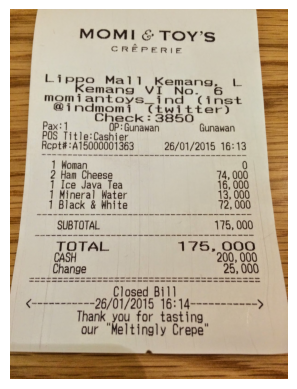

In [ ]:
# Example 2

# Load the image.
img = mpimg.imread('./images/6.jpg')

# OCR detecion.
text = pytesseract.image_to_string(img,lang='eng')
print(text)

# Display the picture.
plt.imshow(img)
plt.axis('off') 
plt.show()

In [13]:
# List that contains the files with text that includes "WAL*MART" o "WALMART".
archivos_con_walmart = []

# OCR for pics 1-5.
for i in range(0, 6): 
    nombre_archivo = f"./images/{i}.jpg"
    
    imagen = Image.open(nombre_archivo)
    texto_ocr = pytesseract.image_to_string(imagen).lower()
    
    # Text verification.
    if "wal*mart" in texto_ocr or "walmart" in texto_ocr:
        archivos_con_walmart.append(nombre_archivo)

# OCR for pics 7-19
for i in range(7, 20):  # Suponiendo que tienes imágenes numeradas del 1 al 19
    nombre_archivo = f"./images/{i}.jpg"
    
    imagen = Image.open(nombre_archivo)
    texto_ocr = pytesseract.image_to_string(imagen).lower()
    
    # Text verification
    if "wal*mart" in texto_ocr or "walmart" in texto_ocr:
        archivos_con_walmart.append(nombre_archivo)

# Print the tickets of Walmart.
print("Files with WAL*MART or WALMART:")
for archivo in archivos_con_walmart:
    print(archivo)

Files with WAL*MART or WALMART:
./images/0.jpg
./images/2.jpg
./images/3.jpg
./images/4.jpg
./images/7.jpg
./images/12.jpg
./images/13.jpg
./images/14.jpg
./images/15.jpg
./images/16.jpg
./images/17.jpg
./images/18.jpg
./images/19.jpg


See back of py,
to win $1000 T9)

BYS-BRY BLO solaraseale
Bad ts
TR HS FRM 4 Sozetotezi98
BAGELS 1013

GV SLIDERS

ACCESSORY 61:
CHEEZE IT

WAS 4.54 YOU SAVI

R. 044000

RUFFLES 10020942 F

GV HNY GRHS OaTeTgOTEES Fi
SUBTOTAL

TAX 1 = 7,000
TOTAL
SH TEND,
ee

wii

il

ry

URN GIGS _a or

6
2
2)
3
0
4
2:
2.
15
9
4
4
0.
6.

i

Mit

Scan vith dalrart app oan receipts




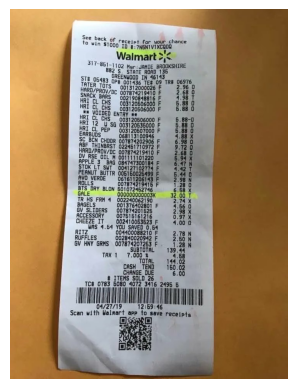

In [14]:
# Example of bad performance in text detection

# Load the image.
img = mpimg.imread('./images/3.jpg')

# OCR detecion.
text = pytesseract.image_to_string(img,lang='eng')
print(text)

# Display the picture.
plt.imshow(img)
plt.axis('off') 
plt.show()

See back oj anew
to win $1060 "Eat id ence

Waimart ><

$17-861- ioe Kar STE BROOKSHIRE
882s. STATE ROAD

SIE gots Seen ae sors,
a

TATE! 2.36 0
HRRD/PROU ne saiyaeisaig | pe8 oD

CK BARS “ oo2isogaagig F 4.98 T
AY GL CHS ogi zogogood F B89
HRY gL cas gosrzos06000 F 8.88 0
HRI cL OHS 205120506000 F 8

RRE 12 “Us 0034, 20830 100 F

or a
Seeds

Hl
aro horns sen erns so
BRaRzSa!
Tee sexes

BS2aSoww xonan

rary
SSReaRsa

2eorenan

ae

wil il i ia iiaay

Scan vith Gainart app Mor oe receipts
e




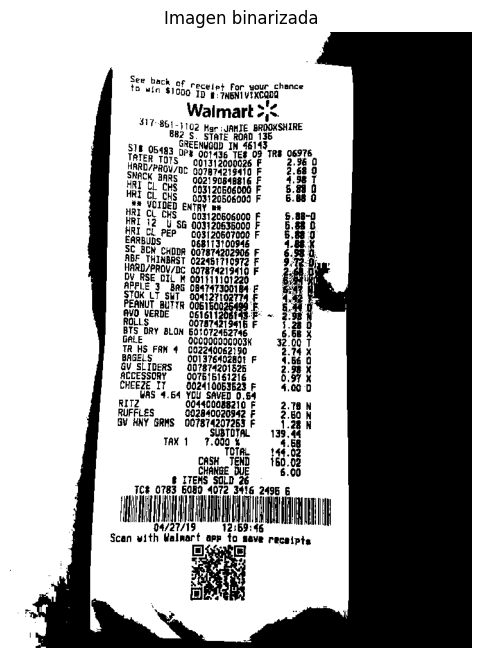

In [15]:
# Load the picture.
image = cv2.imread('./images/3.jpg')

# Transform to gray.
imagen_gris = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Highlight the image.
_, imagen_binaria = cv2.threshold(imagen_gris, 128, 255, cv2.THRESH_BINARY)

# Noise removal.
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
#imagen_filtrada = cv2.morphologyEx(imagen_binaria, cv2.MORPH_OPEN, kernel)

# Increase contrast.
#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
#imagen_contrastada = clahe.apply(imagen_filtrada)

# OCR.
texto_ocr = pytesseract.image_to_string(imagen_binaria)
print(texto_ocr)

# Display the picture in gray.

plt.figure(figsize=(8, 8))
plt.imshow(imagen_binaria, cmap='gray')
plt.title('Imagen binarizada')
plt.axis('off')
plt.show()

Looking for /home/yegekucuk/.keras-ocr/craft_mlt_25k.h5
Looking for /home/yegekucuk/.keras-ocr/crnn_kurapan.h5
Looking for /home/yegekucuk/.keras-ocr/craft_mlt_25k.h5
Looking for /home/yegekucuk/.keras-ocr/crnn_kurapan.h5
Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


2025-03-12 17:45:27.052721: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 707788800 exceeds 10% of free system memory.
2025-03-12 17:45:27.346681: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 707788800 exceeds 10% of free system memory.


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 867ms/step


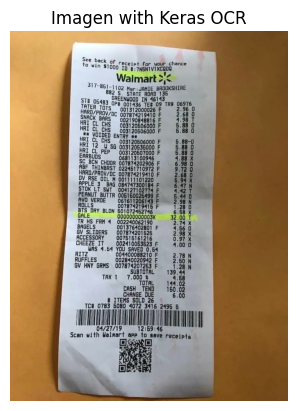

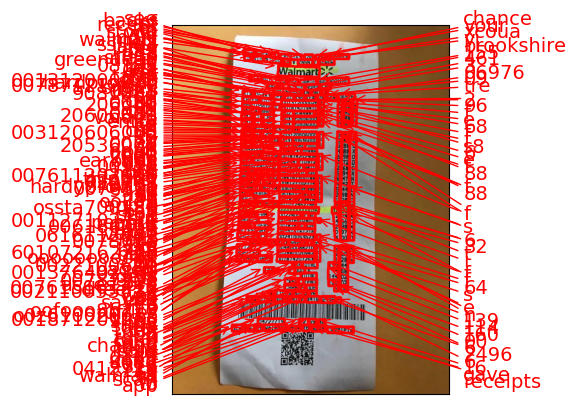

In [16]:
# For preventing an error
import os
os.environ["XLA_FLAGS"] = "--xla_gpu_strict_conv_algorithm_picker=false"

# Trying Keras OCR detector

# Load the detector and recognizer.
detector = Detector()
recognizer = Recognizer()


# Load the pipeline for the OCR.
pipeline = keras_ocr.pipeline.Pipeline()

# Load the picture.
images = [keras_ocr.tools.read('./images/3.jpg')]

# Recognize the image.
prediction_groups = pipeline.recognize(images)

# Load the results.
for i in range(len(images)):
    plt.imshow(images[i])
    plt.title('Imagen with Keras OCR')
    plt.axis('off')
    keras_ocr.tools.drawAnnotations(image=images[i], predictions=prediction_groups[i])
    plt.show()

In [17]:
# Join the text
texto_completo = ""

for text, _ in prediction_groups[0]:
    texto_completo += text + " "

# Print the text.
print(texto_completo)

see backs of receet chance for your to win stoco id xcoua vi ingni walmart siz ssllio2 brookshire her jahie 882 s 155 road stiate greenuoad 461 3 in stt 08183 opi 06976 001 09 tre tet 436 tater tots  2 96 001312000026 f hardprovidc e 68 007871219410 f snack bars f s8 0021 9081881 6 hri cl chs e 0031 206go0 hri cl chs f 88 0031 20606000 voided te entry te hri cl chs  003120606000 f 88  hri 12 v sg 0071 20536000  hri cl pep 0031 2060 700o earbuds 068 151 00916 sc bcn chddr 007611202906 f abe thinbrst 022161 710712 hardyprovide 007e121 9910 dv rse oil 220 m oollo1 apple 9 bag ossta700181  stok lt sut 001127102771 peanut butir 006160026 499 s avo verde 0616112061 3 rolls 0078721 916 bts dry blon 601072162716  6 gale ooooooooook 32 t tr hs frn 0022100621 90 i  bagels 001376402801 f gv iders sl 00787201 828 accessory 007615161216 cheerze t 002110055523 f was 84 you saved 64 s o ritz oofooo8b210 s e  n ruffles o0z610020612 gv hny grms 001871201266 subd total 139 tax 7 000 i 114 total cash ten

In [19]:
# Load the XML file.
with open("./annotations.xml", "r", encoding="utf-8") as file:
    xml_string = file.read()

# Function to extarct the XML data.
def extract_data(element, image_id):
    data = {
        'image_id': image_id,  
        'label': element.get('label'),
        'source': element.get('source'),
        'occluded': element.get('occluded'),
        'z_order': element.get('z_order')
    }
    
    if element.tag == 'box':
        data.update({
            'xtl': element.get('xtl'),
            'ytl': element.get('ytl'),
            'xbr': element.get('xbr'),
            'ybr': element.get('ybr'),
            'rotation': element.get('rotation'),
            'attribute_name': element.find('attribute').get('name'),
            'attribute_text': element.find('attribute').text
        })
    elif element.tag == 'polygon':
        data.update({
            'points': element.get('points')
        })

    return data

# Create the DF
data = []
tree = ET.fromstring(xml_string)  
for image in tree.findall('.//image'):
    image_id = image.get('id')
    for sub_element in image:
        data.append(extract_data(sub_element, image_id))

df = pd.DataFrame(data)

# Display the DF.
df

,image_id,label,source,occluded,z_order,points,xtl,ytl,xbr,ybr,rotation,attribute_name,attribute_text
0,0,receipt,manual,0,0,"39.15,93.53;186.88,67.24;270.27,54.55;332.35,4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,shop,manual,0,0,NaN,153.76,194.59,481.86,245.40,358.70,text,WALMART
2,0,total,manual,0,0,NaN,351.28,604.95,525.83,624.91,1.10,text,TOTAL 5.11
3,0,item,manual,0,0,NaN,106.25,517.30,555.10,541.35,None,text,FRAP 001200010451 F 5.48 N
4,0,item,manual,0,0,NaN,104.28,473.20,556.78,519.90,None,text,BANANAS 000000004011KF 0.41 lb @ 1 lb /0.49 0....
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,9,item,manual,0,0,NaN,104.26,654.60,439.20,669.93,None,text,LINKS MILD 74295503660 5.78 FS
250,9,item,manual,0,0,NaN,132.51,408.60,417.34,438.65,0.20,text,DRUMSTICKS 26841800000 9.91 FS
251,9,item,manual,0,0,NaN,122.23,495.60,422.39,518.13,0.20,text,BAR S MEAT FRNK 1590013401 .88 FS
252,9,item,manual,0,0,NaN,82.79,827.67,443.85,842.20,1.20,text,WINCO SNDWCH WT 7055200115 .91 FS


In [20]:
# Remain only the labels regarding shops, total paid, and items bought.
labels_to_keep = ['shop', 'total', 'item']
filtered_df = df[df['label'].isin(labels_to_keep)]

# Display the DF.
filtered_df

,image_id,label,source,occluded,z_order,points,xtl,ytl,xbr,ybr,rotation,attribute_name,attribute_text
1,0,shop,manual,0,0,NaN,153.76,194.59,481.86,245.40,358.70,text,WALMART
2,0,total,manual,0,0,NaN,351.28,604.95,525.83,624.91,1.10,text,TOTAL 5.11
3,0,item,manual,0,0,NaN,106.25,517.30,555.10,541.35,None,text,FRAP 001200010451 F 5.48 N
4,0,item,manual,0,0,NaN,104.28,473.20,556.78,519.90,None,text,BANANAS 000000004011KF 0.41 lb @ 1 lb /0.49 0....
6,1,total,manual,0,0,NaN,144.02,774.05,529.69,790.61,356.90,text,TOTAL $38.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,9,item,manual,0,0,NaN,104.26,654.60,439.20,669.93,None,text,LINKS MILD 74295503660 5.78 FS
250,9,item,manual,0,0,NaN,132.51,408.60,417.34,438.65,0.20,text,DRUMSTICKS 26841800000 9.91 FS
251,9,item,manual,0,0,NaN,122.23,495.60,422.39,518.13,0.20,text,BAR S MEAT FRNK 1590013401 .88 FS
252,9,item,manual,0,0,NaN,82.79,827.67,443.85,842.20,1.20,text,WINCO SNDWCH WT 7055200115 .91 FS


In [21]:
# Group for 'image_id' y 'label' and create a list of 'attribute_text' for 'item'
grouped_df = filtered_df.groupby(['image_id', 'label'])['attribute_text'].apply(list).reset_index()

# Pivot the table
pivoted_df = grouped_df.pivot_table(index='image_id', columns='label', values='attribute_text', aggfunc='first').reset_index()

# Modify the columns names.
pivoted_df.columns.name = None

# Create a list for different items.
pivoted_df['shop'] = pivoted_df['shop'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)
pivoted_df['total'] = pivoted_df['total'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)

# Display the DF pivoted.

pivoted_df

,image_id,item,shop,total
0,0,"[FRAP 001200010451 F 5.48 N, BANANAS 000000004...",WALMART,TOTAL 5.11
1,1,"[MINI-PEARL TOMATOES.. 2.49, PKG SHREDDED MOZZ...",TRADER JOE'S,TOTAL $38.68
2,10,"[SMOKED VIENNAS 500GR 33.99 A, PEALED PEACHES ...",SPAR,TOTAL FOR 14 ITEMS 338.16
3,11,"[*WT PLUMS BLACK CV 2.15 B, * CAGE FREE ALL WH...",WHOLE FOODS MARKET,NaN
4,12,"[TOOTHBRUSH 003500055500 0.96 X, WOMEN SLIPPE ...",WALMART,TOTAL 18.75
5,13,[GIFT CARD 087458604333 50.00 0],Walmart,TOTAL 50.00
6,14,"[VFUS ENG POM 005100024543 F 7.48 N, LINT ROLL...",Walmart,TOTAL 26.60
7,15,[DIABETES 068113131172H 12.58 N],Walmart,TOTAL 12.58
8,16,"[ASST 27 063099656595 4.88 X, CUTIE CAR 063099...",Walmart,TOTAL 23.19
9,17,"[CAMPARI TOM 073447501213 I 2.98 R, OSCRAN POM...",Walmart,TOTAL 38.68


In [22]:
# Function to convert the 'total' variable to float.
def convert_to_float(text):
    matches = re.findall(r"[-+]?\d*\.\d+|\d+", str(text))
    if matches:
        return float(matches[0])
    else:
        return None

# Apply the function
pivoted_df['total'] = pivoted_df['total'].apply(convert_to_float)

# Replace the value of the row 4 in 'total'.
pivoted_df.at[4, 'total'] = 338.16

# Display the DF.
pivoted_df

,image_id,item,shop,total
0,0,"[FRAP 001200010451 F 5.48 N, BANANAS 000000004...",WALMART,5.11
1,1,"[MINI-PEARL TOMATOES.. 2.49, PKG SHREDDED MOZZ...",TRADER JOE'S,38.68
2,10,"[SMOKED VIENNAS 500GR 33.99 A, PEALED PEACHES ...",SPAR,14.00
3,11,"[*WT PLUMS BLACK CV 2.15 B, * CAGE FREE ALL WH...",WHOLE FOODS MARKET,NaN
4,12,"[TOOTHBRUSH 003500055500 0.96 X, WOMEN SLIPPE ...",WALMART,338.16
5,13,[GIFT CARD 087458604333 50.00 0],Walmart,50.00
6,14,"[VFUS ENG POM 005100024543 F 7.48 N, LINT ROLL...",Walmart,26.60
7,15,[DIABETES 068113131172H 12.58 N],Walmart,12.58
8,16,"[ASST 27 063099656595 4.88 X, CUTIE CAR 063099...",Walmart,23.19
9,17,"[CAMPARI TOM 073447501213 I 2.98 R, OSCRAN POM...",Walmart,38.68
